In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import networkx as nx
import pickle

# Load the synaptic and proximity connectome

In [6]:
connectome_path = "../Data/minnie65_multidigraph.pkl"

with open(connectome_path, "rb") as f:
    G_syn = pickle.load(f)

G_syn

In [24]:
G_prox = G

In [4]:
proximity_connectome_path = "../Data/proximity_graph.pkl"

with open(proximity_connectome_path,"rb") as f:
    G_prox = pickle.load(f)

G_prox

In [ ]:
out = dict(G_prox.out_degree())

In [25]:
len(G_syn.nodes()),len(G_prox.nodes())

(52261, 39540)

# Inspect proximity edges and comparing them to synaptic edges

In [40]:
pre = "864691134884749562_0"

In [37]:
dict(G_syn[pre]).keys()

dict_keys(['864691135617829519_0', '864691135725605183_0', '864691136388246135_0', '864691135396391713_0', '864691135544372520_0', '864691135695990426_0', '864691136227288657_0', '864691135937395509_0', '864691135577214725_0', '864691136443751043_0', '864691135969264485_0', '864691136925354314_0', '864691135866963990_0', '864691135937406005_0', '864691135616011113_0'])

In [36]:
post = "864691135866963990_0"

In [66]:
prox_edges = dict(G_prox[pre][post])
print(f"# of prox edges = {len(prox_edges)}")
prox_edges

# of prox edges = 2


{0: {'prox_id': 1,
  'proximity_dist_non_adjusted': 597.586,
  'presyn_proximity_x_nm': 878601.0,
  'presyn_proximity_y_nm': 596953.0,
  'presyn_proximity_z_nm': 1046060.0,
  'postsyn_proximity_x_nm': 879175.0,
  'postsyn_proximity_y_nm': 597061.0,
  'postsyn_proximity_z_nm': 1046180.0,
  'presyn_width': 187.879,
  'postsyn_width': 299.714,
  'n_synapses': 1,
  'presyn_skeletal_distance_to_soma': 126487.0,
  'postsyn_skeletal_distance_to_soma': 141174.0,
  'postsyn_compartment': 'apical'},
 1: {'prox_id': 2,
  'proximity_dist_non_adjusted': 2915.97,
  'presyn_proximity_x_nm': 889648.0,
  'presyn_proximity_y_nm': 599899.0,
  'presyn_proximity_z_nm': 1077560.0,
  'postsyn_proximity_x_nm': 891460.0,
  'postsyn_proximity_y_nm': 600705.0,
  'postsyn_proximity_z_nm': 1075420.0,
  'presyn_width': 101.681,
  'postsyn_width': 128.615,
  'n_synapses': 0,
  'presyn_skeletal_distance_to_soma': 145518.0,
  'postsyn_skeletal_distance_to_soma': 153602.0,
  'postsyn_compartment': 'apical'}}

In [39]:
syn_edges = dict(G_syn[pre][post])
print(f"# of syn edges = {len(syn_edges)}")
syn_edges

# of syn edges = 1


{0: {'postsyn_branch_idx': 17.0,
  'postsyn_compartment_coarse': 'dendrite',
  'postsyn_compartment_fine': 'apical',
  'postsyn_limb_idx': 0.0,
  'postsyn_nucleus_id': 336239,
  'postsyn_skeletal_distance_to_soma': 143709.15,
  'postsyn_spine_bouton': 'shaft',
  'presyn_branch_idx': 4.0,
  'presyn_compartment_coarse': 'axon',
  'presyn_compartment_fine': nan,
  'presyn_limb_idx': 0.0,
  'presyn_nucleus_id': 328979,
  'presyn_skeletal_distance_to_soma': 131512.25,
  'presyn_spine_bouton': 'bouton',
  'proof_type': 'auto',
  'synapse_id': 229340626,
  'synapse_size': 8488,
  'synapse_x': 219732,
  'synapse_y': 149184,
  'synapse_z': 26158,
  'presyn_soma_euclid_dist': np.float64(68117.43156693145),
  'postsyn_soma_euclid_dist': np.float64(139465.31384225044),
  'presyn_soma_postsyn_soma_euclid_dist': np.float64(178366.87983766646),
  'presyn_soma_postsyn_soma_skeletal_dist': np.float64(275221.4),
  'presyn_cell_type': 'excitatory',
  'postsyn_cell_type': 'excitatory',
  'presyn_gnn_cell_

In [41]:
from datasci_tools import ipyvolume_utils as ipvu

# Looking at the neuron objects

In [44]:
!pip3 install bz2file

  Preparing metadata (setup.py) ... done
  Created wheel for bz2file: filename=bz2file-0.98-py3-none-any.whl size=6868 sha256=f95f3f1d351a0edb4696ef422af4464610e926915f806d7694d5e9aad2d7ad33
  Stored in directory: /root/.cache/pip/wheels/f8/dc/a2/d5648eee379349a57b03ccf386862f09826575087464f070b2
Successfully built bz2file

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [55]:
pre_path = f"../Data/{pre}_auto_proof_v7_proofread.pbz2"
post_path = f"../Data/{post}_auto_proof_v7_proofread.pbz2"

from datasci_tools import system_utils as su
pre_neuron = su.decompress_pickle(pre_path)
post_neuron = su.decompress_pickle(post_path)

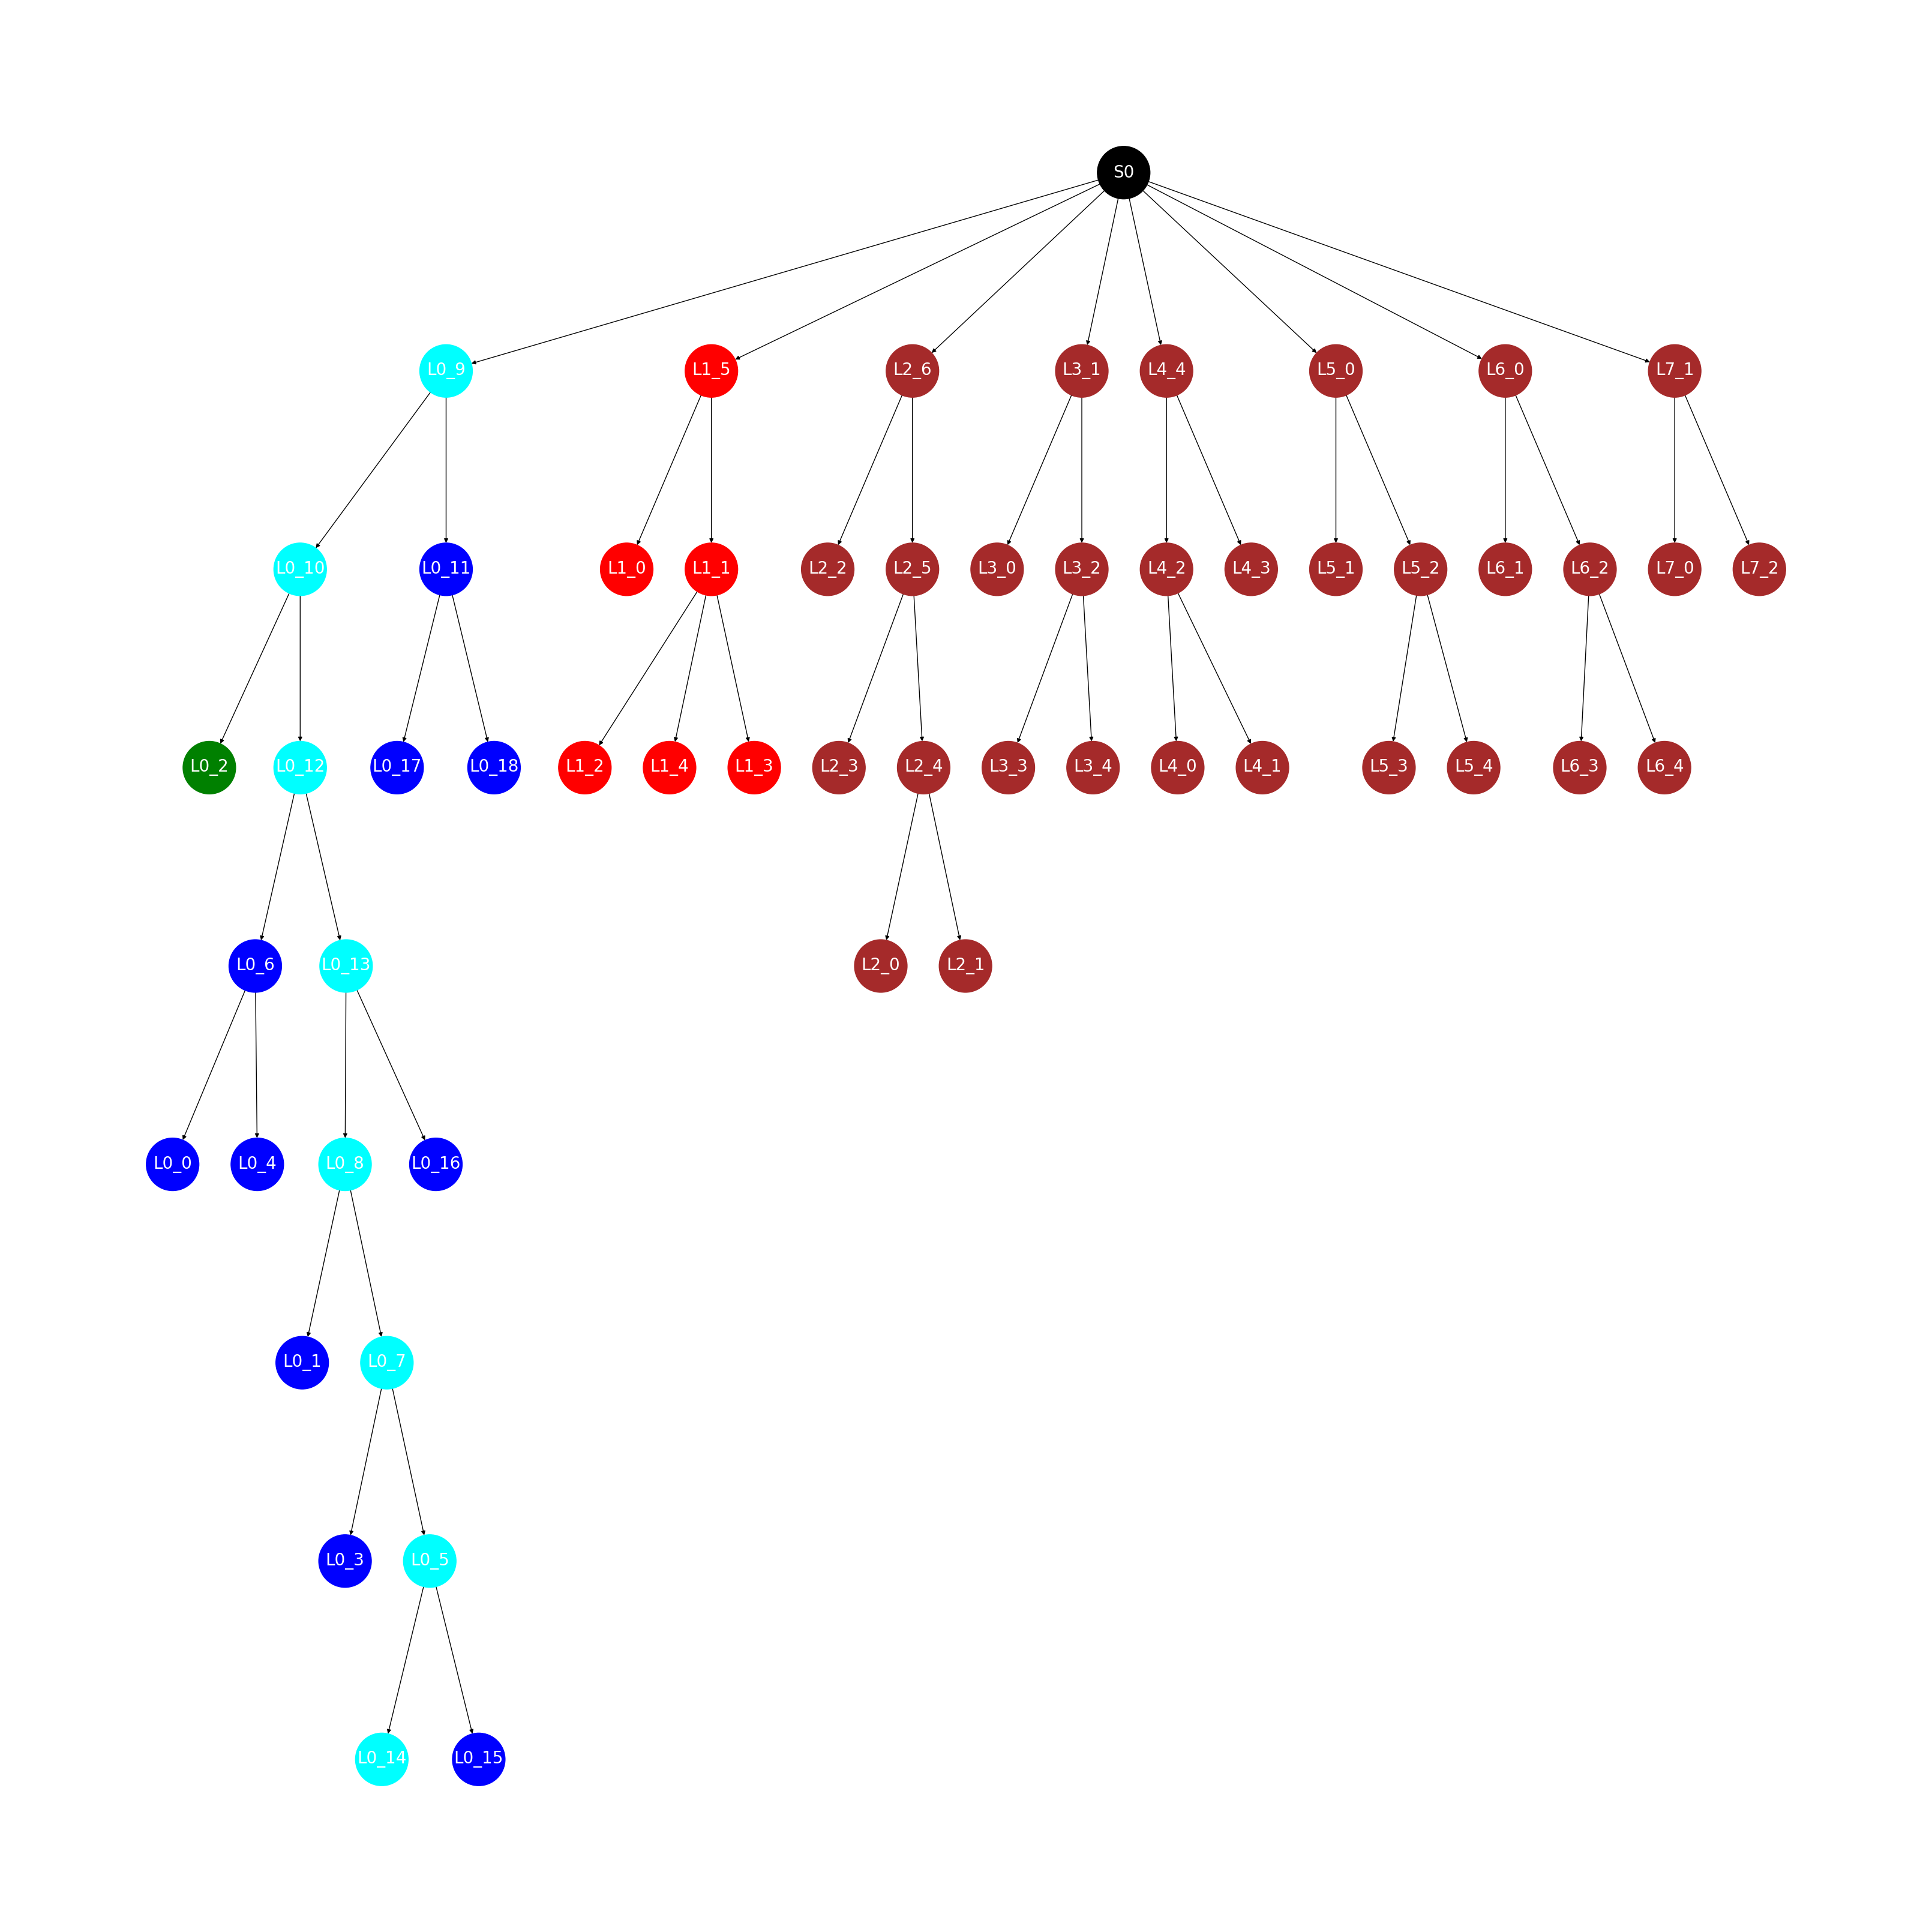

In [56]:
from neuron_morphology_tools import neuron_nx_utils as nxu
nxu.draw_tree(post_neuron)

In [57]:
def skeleton_from_neuron_nx(neuron):
    sk_nodes,sk_edges = nxu.skeleton(neuron)
    skeleton = sk_nodes[sk_edges]
    return skeleton

def coordinate_from_prox_dict(d):
    return np.array([d[f'presyn_proximity_{ax}_nm'] for ax in ['x','y','z']])

In [68]:
from datasci_tools import ipyvolume_utils as ipvu

import numpy as np
syn_coords = np.array([coordinate_from_prox_dict(k) for k in prox_edges.values() 
                      if k['n_synapses'] > 0])
prox_coords = np.array([coordinate_from_prox_dict(k) for k in prox_edges.values()
                      if k['n_synapses'] == 0])

pre_sk, post_sk = (
    skeleton_from_neuron_nx(pre_neuron),
    skeleton_from_neuron_nx(post_neuron),
)

pre_color,post_color = "red","blue"
syn_color,prox_color = "green","purple",
ipvu.plot_objects(
    skeletons=[pre_sk,post_sk],
    skeletons_colors=[pre_color,post_color],
    scatters=[syn_coords,prox_coords],
    scatters_colors=[syn_color,prox_color],
scatter_size=1)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…